# Prediction with Unsupervised Machine Learning - Optimum Number of Clusters and Visualization 

In [2]:
#Importing libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [3]:
#Loading the Iris Dataset
#Allows us to view the first 5 ros from the Iris Dataset

iris = datasets.load_iris()
iris_df= pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Finding the optimum number of clusters for K-Means 

 K-Means Clustering -  method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean 

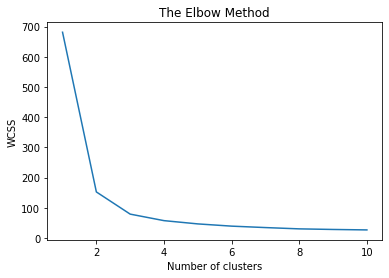

In [5]:
#finding the optimum number of clusters for k-means classification

x=iris_df.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans

#WCSS = Within Cluster Sum of Squares 
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto the line graph and allowing us to observe 'the elbow'

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# Observation of Cluster Analysis

In cluster analysis, the Elbow Method is utilized to determine the num of clusters in a data set.

define 'Clusters' - group of objects, numbers, data points, or people that are located closelt together. 

In the line graph above we can view an elbow-shaped curve. The optimum cluster is where the elbow occurs! More specifically, this is when the WCSS, or 'within cluster sum of squares,' does not decrease significantly with every iteration.

In [6]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

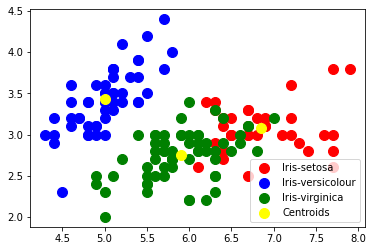

In [12]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()